In [1]:
# %load batch_norm_test.py
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

def box_off():
    ax=plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list

In [3]:
# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

train_acc_all = []
bn_train_acc_all = []

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    train_acc_all.append(train_acc_list)
    bn_train_acc_all.append(bn_train_acc_list)

============== 1/16 ==============
epoch:0 | 0.092 - 0.066
epoch:1 | 0.117 - 0.079
epoch:2 | 0.117 - 0.113
epoch:3 | 0.117 - 0.135
epoch:4 | 0.117 - 0.163
epoch:5 | 0.117 - 0.182
epoch:6 | 0.117 - 0.2
epoch:7 | 0.117 - 0.217
epoch:8 | 0.117 - 0.234
epoch:9 | 0.117 - 0.251
epoch:10 | 0.117 - 0.268
epoch:11 | 0.117 - 0.277
epoch:12 | 0.117 - 0.3
epoch:13 | 0.117 - 0.314
epoch:14 | 0.117 - 0.327
epoch:15 | 0.117 - 0.345
epoch:16 | 0.117 - 0.361
epoch:17 | 0.117 - 0.375
epoch:18 | 0.117 - 0.394
epoch:19 | 0.117 - 0.403
============== 2/16 ==============
epoch:0 | 0.097 - 0.154
epoch:1 | 0.097 - 0.127


../common/multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
../common/multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:2 | 0.097 - 0.156
epoch:3 | 0.097 - 0.173
epoch:4 | 0.097 - 0.185
epoch:5 | 0.097 - 0.206
epoch:6 | 0.097 - 0.228
epoch:7 | 0.097 - 0.257
epoch:8 | 0.097 - 0.273
epoch:9 | 0.097 - 0.302
epoch:10 | 0.097 - 0.314
epoch:11 | 0.097 - 0.337
epoch:12 | 0.097 - 0.351
epoch:13 | 0.097 - 0.368
epoch:14 | 0.097 - 0.38
epoch:15 | 0.097 - 0.397
epoch:16 | 0.097 - 0.407
epoch:17 | 0.097 - 0.423
epoch:18 | 0.097 - 0.434
epoch:19 | 0.097 - 0.465
============== 3/16 ==============
epoch:0 | 0.099 - 0.113
epoch:1 | 0.301 - 0.107
epoch:2 | 0.429 - 0.128
epoch:3 | 0.502 - 0.161
epoch:4 | 0.588 - 0.178
epoch:5 | 0.648 - 0.217
epoch:6 | 0.679 - 0.268
epoch:7 | 0.699 - 0.319
epoch:8 | 0.733 - 0.358
epoch:9 | 0.763 - 0.392
epoch:10 | 0.775 - 0.441
epoch:11 | 0.801 - 0.469
epoch:12 | 0.821 - 0.49
epoch:13 | 0.848 - 0.535
epoch:14 | 0.866 - 0.558
epoch:15 | 0.881 - 0.582
epoch:16 | 0.899 - 0.6
epoch:17 | 0.905 - 0.624
epoch:18 | 0.929 - 0.642
epoch:19 | 0.924 - 0.658
============== 4/16 ==============
ep

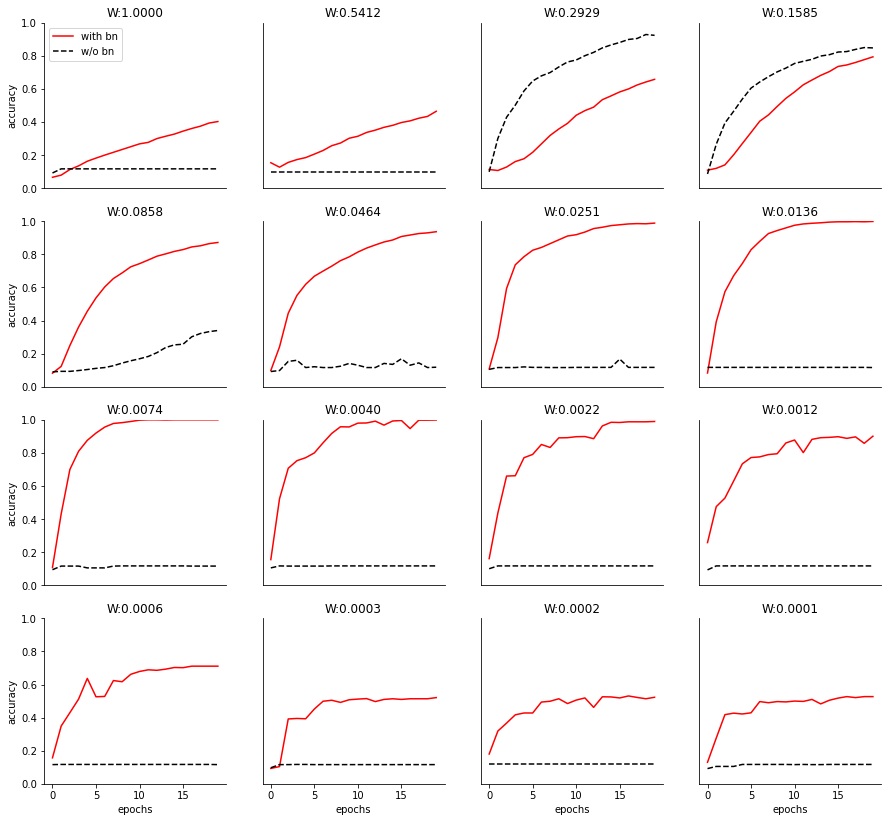

In [9]:
plt.figure(figsize=(15,14))  
for i, w in enumerate(weight_scale_list):
    train_acc_list = train_acc_all[i]
    bn_train_acc_list = bn_train_acc_all[i]

    plt.subplot(4,4,i+1)
    plt.title("W:" + "{:.4f}".format(w))
    
    plt.plot(x, bn_train_acc_list, c='r', markevery=2)
    plt.plot(x, train_acc_list, c='k', linestyle="--", markevery=2)
    if i == 0:
        plt.legend(['with bn','w/o bn'], loc='upper left')

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")

    box_off()